#Prerequistites

The libraries that shall be used within the project are listed here accompanied by necessary variables and stages within the project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#PROBLEM STATEMENT

##Specifying the question

Withing the execution of the project the following questions shall be answered or are aimed to be answered:

* How do we make a model that will predict the pricing of a real estate properties?
* What regressive model shall be used to predict the model of the real estate properties?
* What are the factors that affect housing prices?

##Metric of success

The project shall be deemed successful if the resulting model that shall go forth shall have an accuracy of prediction of 80% and above of the prices of the properties.

To add onto; the factors that affect housing prices shall be investigated within the available data.

##Understanding the context

Real estate as a business has been termed as ‘where banks bank.’ In the sense that most of the primary sources of income are mainly secured by real estate thus the ‘this is the industry that where keep our money for safekeeping in turn keeps our money for safekeeping.’

That said this is a lucrative market and the need to predict the prices of the properties is very essential.


##Experimenta design

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression

##Data relevance

The data was collected from Hass Consulting Company that is a real estate leader with 25 years of experience.

#READING ANG EXPLORATION

##The code

Here the document is opened and viewed.

In [3]:
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

In [4]:
df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df.tail(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.shape

(21613, 20)

In [7]:
#Making of a descriptive table of the descriptions of the data in columns and 
#some of their properties

desc = pd.DataFrame(df.dtypes)
desc.columns = ['Types']
desc['max'] = ''
desc['min'] = ''
for t , row in desc.iterrows():
  desc.loc[ t , 'max'] = df[t].max()
  desc.loc[ t , 'min'] = df[t].min()

##The summary

In [8]:
desc

,Types,max,min
id,int64,9900000190,1000102
price,float64,7.7e+06,75000
bedrooms,int64,33,0
bathrooms,float64,8,0
sqft_living,int64,13540,290
sqft_lot,int64,1651359,520
floors,float64,3.5,1
waterfront,int64,1,0
view,int64,4,0
condition,int64,5,1


In [9]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

Due to the common conception of floors being integers; the properties of the data on floors is looked further into. [Floors.](markbrinkley.blogspot.com/2006/09/what-is-one-and-half-storey-house.html)

From the above we can tell the following:
1. ID is the description of the property


#APPROPRIATENESS

The data is from a privately held company. There is no other source for confirming the appropriateness of the data.

#CLEANING

##Missing Values and duplicates

Null values are sought after within the dataset along with duplicates which are dropped.

In [10]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(21610, 20)

##Anomalies

From the process above_ whereby the data types were shown; an misrepresentation of the data type would occur if anomilies existed within the data which thus leads to a conclusion that there is no anomaly within the data. 

##Outliers

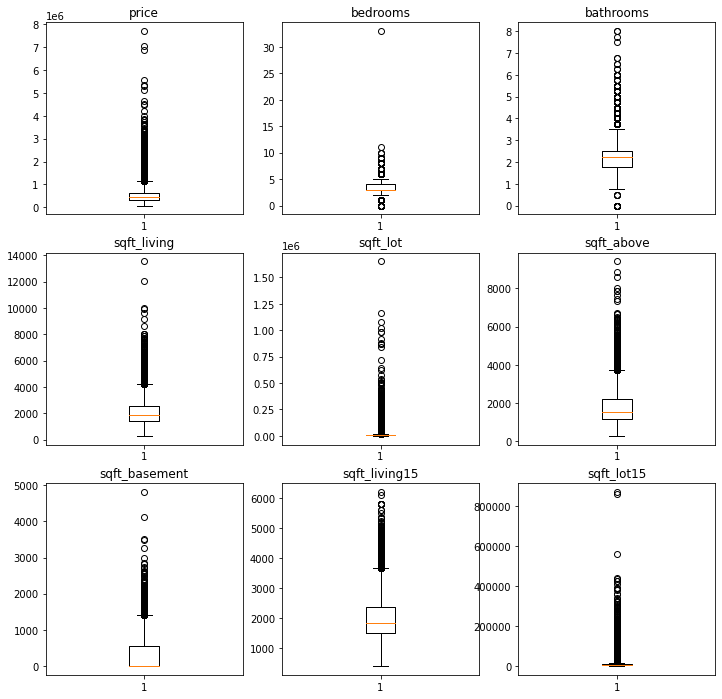

In [13]:
#Box plots are plotted to look for outliers

useablecol = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']

f , a = plt.subplots(nrows = 3 , ncols = 3, figsize = (12,12) )
for er in range (0, len(useablecol)):
  plt.subplot(3,3,(er + 1 ))
  plt.boxplot(df[useablecol[er]])
  plt.title(useablecol[er])


In [14]:
#The 3rd quartile values and the 1st quartile values are added to the 
#description table for preperation of dropping the outliers

desc['.25'] = ''
desc['.75'] = ''
for t , row in desc.iterrows():
  desc.loc[ t , '.25'] = df[t].quantile(.25)
  desc.loc[ t , '.75'] = df[t].quantile(.75)

desc

,Types,max,min,.25,.75
id,int64,9900000190,1000102,2.12305e+09,7.3089e+09
price,float64,7.7e+06,75000,321612,645000
bedrooms,int64,33,0,3,4
bathrooms,float64,8,0,1.75,2.5
sqft_living,int64,13540,290,1425.5,2550
sqft_lot,int64,1651359,520,5040,10688.8
floors,float64,3.5,1,1,2
waterfront,int64,1,0,0,0
view,int64,4,0,0,0
condition,int64,5,1,3,4


In [15]:
#copying of dataset to clean

cleaned1 = df.copy()

In [16]:
#dropping of outliers

for we in useablecol:
  cleaned1 = cleaned1[cleaned1[we].between(desc.loc[ we , '.25'] ,desc.loc[ we , '.75'])]

In [17]:
cleaned1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
81,7437100340,360000.0,4,2.50,1900,5889,2.0,0,0,3,7,1900,0,1992,0,98038,47.3490,-122.031,1870,6405
121,6675500070,391500.0,3,2.00,1450,9132,1.0,0,0,3,7,1450,0,1987,0,98034,47.7288,-122.226,1580,9104
187,1954440060,560000.0,3,2.50,1900,8744,2.0,0,0,3,8,1900,0,1987,0,98074,47.6200,-122.043,2030,8744
224,705700390,328000.0,3,2.25,2020,8379,2.0,0,0,3,7,2020,0,1994,0,98038,47.3828,-122.023,2020,8031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21349,1704900303,608000.0,3,2.25,1720,5234,2.0,0,0,3,9,1240,480,2011,0,98118,47.5547,-122.278,1720,5825
21378,7853321110,409000.0,3,2.50,1950,7263,2.0,0,0,3,7,1950,0,2007,0,98065,47.5194,-121.869,2190,5900
21392,321030150,358000.0,3,2.50,2026,7611,2.0,0,0,3,8,2026,0,2010,0,98042,47.3733,-122.162,2270,7611
21447,7853360620,425000.0,3,2.50,1950,5689,2.0,0,0,3,7,1950,0,2009,0,98065,47.5158,-121.873,2190,5653


##Correlations

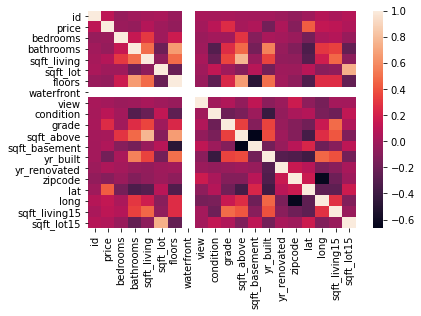

In [18]:
sns.heatmap(cleaned1.corr())

In [19]:
cleaned1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.113519,-0.035827,0.002305,0.022516,0.034467,-0.029036,NaN,0.026781,0.018961,0.026822,0.012903,0.006111,0.008135,-0.018840,-0.054529,-0.006927,0.081444,0.033457,0.079021
price,0.113519,1.000000,-0.023885,-0.043360,0.075542,-0.007565,-0.052864,NaN,0.011030,0.098920,0.256971,0.022368,0.053075,-0.174602,0.046950,-0.101459,0.428406,0.130931,0.111396,0.062684
bedrooms,-0.035827,-0.023885,1.000000,0.144835,0.308081,-0.002458,0.169966,NaN,-0.021153,0.009210,0.001225,0.294503,-0.099998,0.037169,0.013899,-0.023960,-0.169352,0.041688,0.076531,-0.032805
bathrooms,0.002305,-0.043360,0.144835,1.000000,0.489793,-0.198968,0.660034,NaN,-0.013207,-0.294180,0.260703,0.475243,-0.169933,0.561216,-0.036444,-0.114728,-0.332376,0.303403,0.342640,-0.238411
sqft_living,0.022516,0.075542,0.308081,0.489793,1.000000,-0.066835,0.482025,NaN,0.027387,-0.209728,0.355557,0.766629,-0.029901,0.344619,-0.047756,-0.062972,-0.292591,0.183097,0.472229,-0.074922
sqft_lot,0.034467,-0.007565,-0.002458,-0.198968,-0.066835,1.000000,-0.217765,NaN,-0.007536,0.125470,-0.004571,-0.103407,0.083211,-0.172190,-0.013024,-0.016297,0.093797,-0.085993,-0.061196,0.743253
floors,-0.029036,-0.052864,0.169966,0.660034,0.482025,-0.217765,1.000000,NaN,-0.029168,-0.257424,0.234715,0.667551,-0.478340,0.494267,0.001256,-0.072755,-0.319137,0.262242,0.262554,-0.238134
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.026781,0.011030,-0.021153,-0.013207,0.027387,-0.007536,-0.029168,NaN,1.000000,-0.000923,0.058309,-0.055183,0.117771,-0.085072,-0.025634,0.172420,-0.069781,-0.162292,0.017601,0.005856
condition,0.018961,0.098920,0.009210,-0.294180,-0.209728,0.125470,-0.257424,NaN,-0.000923,1.000000,-0.197337,-0.145144,-0.018076,-0.413228,-0.049007,0.034751,0.075966,-0.150339,-0.191590,0.128437


Due to the heatmap above the dataset without outliers is dropped in favour of the original dataset. This is due to the none integral data whilst the data is dropped. 

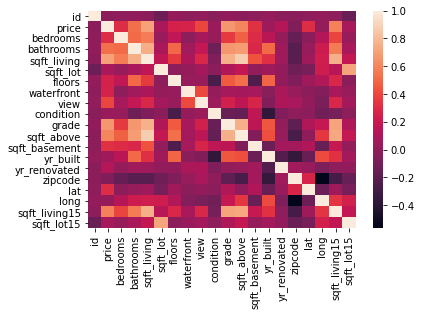

In [20]:
sns.heatmap(df.corr())

In [21]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


#EDA

In [22]:
foreda = df.copy()

Histograms are made to look at the distribution of properties within the descriptive data on the dataset.

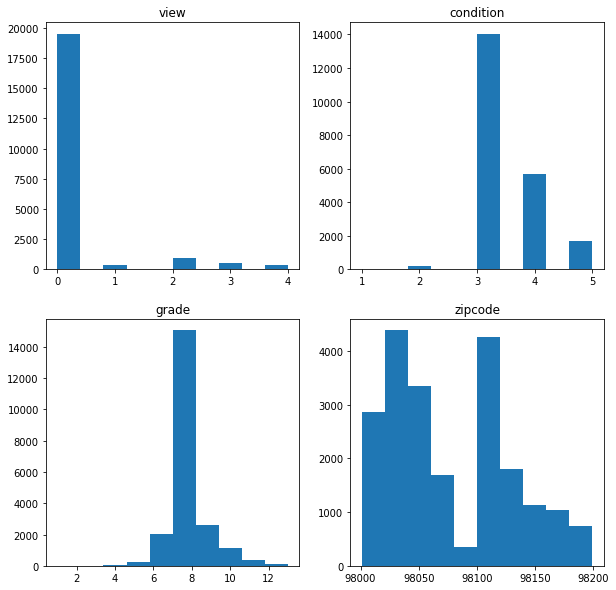

In [23]:
#data that is descriptive or corresponds to rate are defined within histograms 
#to give an overview of their popularity

tohist = ['view', 'condition' , 'grade' , 'zipcode']

plt.subplots(nrows = 2 , ncols= 2, figsize = (10,10))

for g in range (0,len(tohist)):
  plt.subplot(2,2,(g+1))
  plt.hist(foreda[tohist[g]])
  plt.title(tohist[g])

A view on the relationship of price to the other components of the dataset are looked at.

In [32]:
bi = foreda.drop(columns= ['id', 'lat','long'], axis = 1)

bi.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

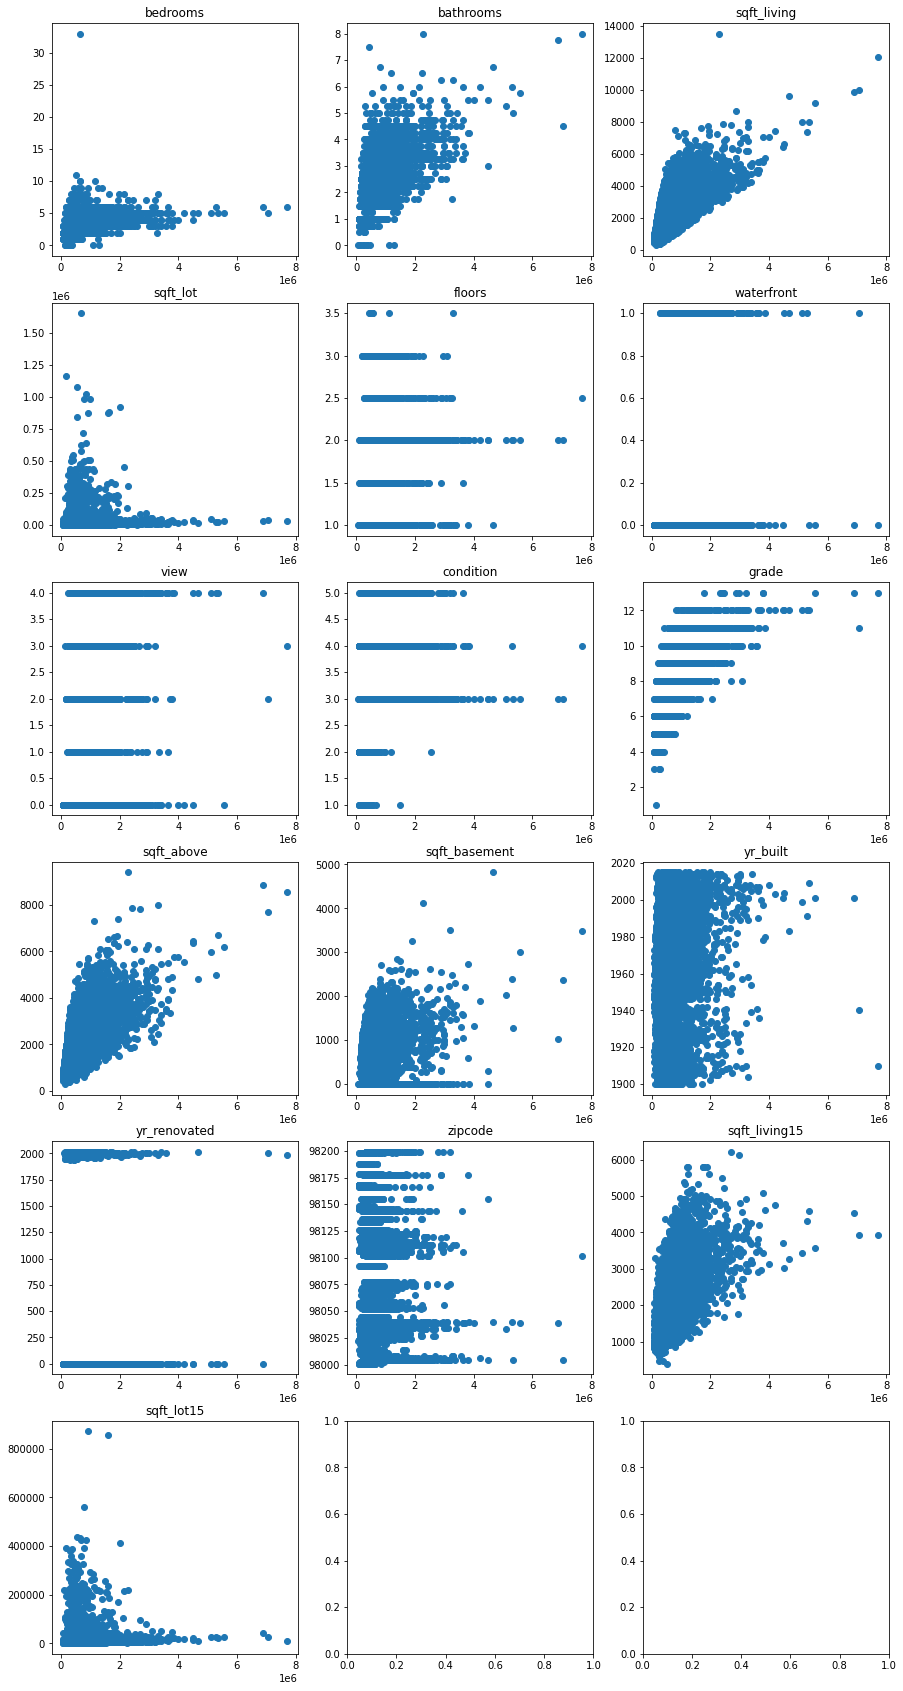

In [34]:
tobi = bi.columns
plt.subplots(nrows = 6 , ncols= 3, figsize = (15,30))
for g in range (1,len(tobi)):
  plt.subplot(6,3,(g))
  plt.scatter(bi['price'] , bi[tobi[g]])
  plt.title(tobi[g])

#REGRESSION ANALYSIS

In [ ]:
forreg = cleaned1.copy()

In [ ]:
rc = forreg.columns[2:]

##Mutiple regression

In [ ]:
y = forreg['price']
x = forreg[rc]

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(x)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, y)))

Mean squared error: 4521578650.43
Variance score: 0.43


##Quantile Regression

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = sm.datasets.engel.load_pandas().data
data = sm.add_constant(forreg)

In [ ]:
yq = forreg['price']
xq = pd.DataFrame.to_numpy(forreg[rc])

In [ ]:
mod = smf.quantreg('price ~ sqft_lot15', forreg)
res = mod.fit(q= .5)
print (res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:            0.0007397
Model:                       QuantReg   Bandwidth:                   4.767e+04
Method:                 Least Squares   Sparsity:                    2.810e+05
Date:                Mon, 23 Nov 2020   No. Observations:                  781
Time:                        10:57:12   Df Residuals:                      779
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.162e+05   3.26e+04     12.752      0.000    3.52e+05     4.8e+05
sqft_lot15     3.4647      4.139      0.837      0.403      -4.661      11.590

The condition number is large, 5.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


In [ ]:
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

In [ ]:
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['sqft_lot15']] + res.conf_int().loc['sqft_lot15'].tolist())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [ ]:
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt      intercept     x_coef  cf_lower_bound  cf_upper_bound
0  0.1       0.005155  41.866766       33.678445       50.055086
1  0.2  315307.224780   6.076975        0.628624       11.525326
2  0.3  342570.810382   5.704170       -1.503127       12.911467
3  0.4  378294.491493   5.296610       -2.707850       13.301071
4  0.5  416235.166763   3.464703       -4.661053       11.590460
5  0.6  404430.693711   8.736911       -0.537313       18.011135
6  0.7  455437.308060   7.136405       -2.020777       16.293587
7  0.8  269483.206362  31.395855       22.254008       40.537702
8  0.9  556813.368388   3.309067       -5.307357       11.925491


##Ridge Regression

In [ ]:
yrid = forreg['price']
xrid = forreg[rc]

In [ ]:
regression = LinearRegression()
regression.fit(xrid,yrid)
first_model = (mean_squared_error(y_true=yrid,y_pred=regression.predict(xrid)))
print(first_model)

4521578650.433603


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,forreg.columns):
    coef_dict_baseline[feat] = [coef]
linearco = pd.DataFrame(coef_dict_baseline).T

In [ ]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(xrid,yrid)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

4719020677.494583

In [ ]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(xrid,yrid)
second_model = (mean_squared_error(y_true=yrid,y_pred=ridge.predict(xrid)))
print(second_model)

ridgemse = second_model

4522311404.548369


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,forreg.columns):
    coef_dict_baseline[feat] = [coef]
coef_dict_baseline
ridgeco = pd.DataFrame(coef_dict_baseline).T

In [ ]:
ridgeco

,0
id,2602.888623
price,15372.308569
bedrooms,32.905539
bathrooms,-5.292091
sqft_living,3053.860228
sqft_lot,0.000000
floors,15903.058274
waterfront,15475.740024
view,50751.068154
condition,12.658874


##Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
ylas = forreg['price']
xlas = forreg[rc]

In [ ]:
scaler = StandardScaler()
xlasstd = scaler.fit_transform(xlas)

In [ ]:
lasso = linear_model.Lasso()

In [ ]:
lasso.fit(xlasstd, ylas)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133986225907.92627, tolerance: 619444361.3444763
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print("lasso score:", lasso.score(xlas, ylas)) 
print("lasso MSE:", mean_squared_error(ylas, lasso.predict(xlas))) 
print("lasso coef:", lasso.coef_) 

lasso score: -52518032.18751373
lasso MSE: 4.165428876684693e+17
lasso coef: [  1319.25644918   4978.32671414  14039.00730635  -7164.22749778
   1587.14975329      0.           4848.73157806   9506.65872598
  30148.74086552  -5393.79349821  -3224.97075403 -26667.60341685
   -869.64261182  -5784.73103928  47063.72736538  24163.001151
   4193.75687622    919.95679736]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xlas, ylas, test_size=0.2, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

In [ ]:
gridlasso.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
second_model=(mean_squared_error(y_true=yen,y_pred=lasso.predict(xen)))
print(second_model)

lassomse = second_model

4532240258.133044


##Elastic Net Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
yen = forreg['price']
xen = forreg[rc]

In [ ]:
regression=LinearRegression()
regression.fit(xen,yen)
first_model=(mean_squared_error(y_true=yen,y_pred=regression.predict(xen)))
print(first_model) 

4521578650.433603


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,xen.columns):
    coef_dict_baseline[feat] = [coef]
linearco = pd.DataFrame(coef_dict_baseline).T

In [ ]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(xen,yen)
search.best_params_
abs(search.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1446991028161.8062, tolerance: 554273000.5841261
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1466432821723.9644, tolerance: 557562665.8935431
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1438264345691.5537, tolerance: 560026998.2405806
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147547622

4717240521.808828

In [ ]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(xen,yen)
second_model=(mean_squared_error(y_true=yen,y_pred=elastic.predict(xen)))
print(second_model)

elasticmse = second_model

4681434767.106132


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,xen.columns):
    coef_dict_baseline[feat] = [coef]
elasticco = pd.DataFrame(coef_dict_baseline).T

In [ ]:
elasticco

,0
bedrooms,1091.689776
bathrooms,6814.947769
sqft_living,29.150402
sqft_lot,-3.866562
floors,870.839581
waterfront,0.000000
view,11626.991549
condition,13337.097876
grade,39768.671576
sqft_above,11.259098


#RECOMMENDATION 

It is seen above from the high mse that the regreeion methods above are not sufficient to make a reliable model.

#CHALLENGE

The date of the listsings of the properties should be added within the dataset. This is due to the hint of the transformation of the properties that is indicated by the different sizes of the data with the last two columns.